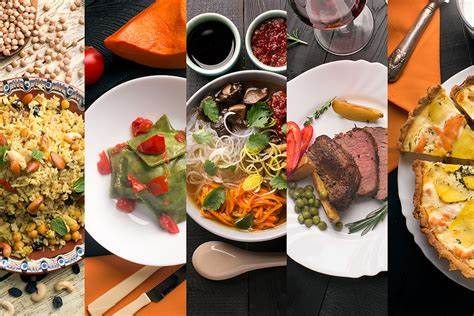

# <center> EDA ON CUISINE RATINGS DATASET

#### Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings( 'ignore')

In [2]:
data = pd.read_csv( 'Cuisine_rating.csv')
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


##### Different Data types in dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Area code,200.0,141.060,26.130257,101.0,123.00,135.0,158.00,199.0
YOB,200.0,1984.830,16.809339,1955.0,1971.00,1987.0,2000.00,2009.0
Budget,200.0,3.815,1.056578,1.0,3.00,4.0,5.00,5.0
Food Rating,200.0,3.220,1.411226,1.0,2.00,3.0,5.00,5.0
Service Rating,200.0,3.230,1.526022,1.0,2.00,3.0,5.00,5.0
Overall Rating,200.0,3.225,1.079445,1.0,2.50,3.0,4.00,5.0


In [5]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

##### Null Value Average in dataset

In [6]:
data.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

In [7]:
data.rename(columns={'Marital Status' : 'MaritalStatus' ,'Food Rating' :'FoodRating' , \
                     'Alcohol ' :'Alcohol','Service Rating':'ServiceRating',\
                     'Overall Rating':'OverallRating', 'Often A S' :'Often_A_S'} , inplace= True)

#### Feature engineering Age column

In [8]:
data[ 'Age'] = [(2023- YOB) for YOB in data ['YOB']] ## like  for loop -i in range ## Feature engineering- adding new column in a dataset
data.head()

,User ID,Area code,Location,Gender,YOB,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often_A_S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,17
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,32
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,46
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,67
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,26


In [9]:
data.drop( columns= ['User ID' ,'Area code', 'YOB'] , inplace= True)

In [10]:
data.shape

(200, 13)

In [11]:
data.columns

Index(['Location', 'Gender', 'MaritalStatus', 'Activity', 'Budget', 'Cuisines',
       'Alcohol', 'Smoker', 'FoodRating', 'ServiceRating', 'OverallRating',
       'Often_A_S', 'Age'],
      dtype='object')

In [12]:
data.duplicated().sum()

79

In [13]:
data.drop_duplicates(inplace= True)

#### UNIVARIATE ANALYSIS

In [14]:
data.Cuisines.value_counts()

Japanese    23
Indian      22
Filipino    19
French      18
Seafood     14
Chinese     14
Italian     11
Name: Cuisines, dtype: int64

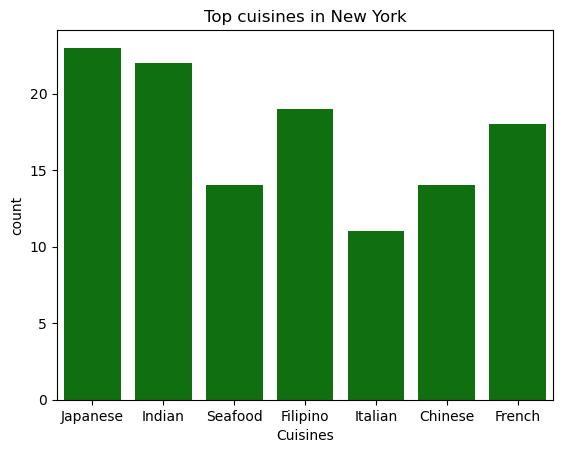

In [15]:
plt.title( 'Top cuisines in New York' )
sns.countplot( data= data , x = 'Cuisines',color = 'green')
plt.show()

#####   Most Number of people  in New York prefer Japanese Cuisines

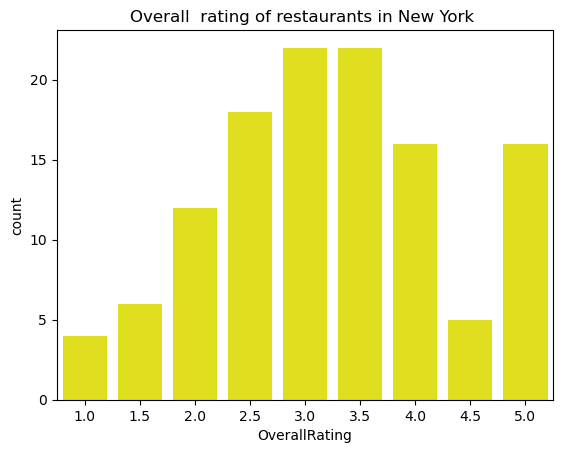

In [16]:
plt.title('Overall  rating of restaurants in New York ')
sns.countplot( data = data , x = 'OverallRating' , color = 'yellow')
plt.show()

##### Most Number of restaurants have overall rating in range 3.5 -4

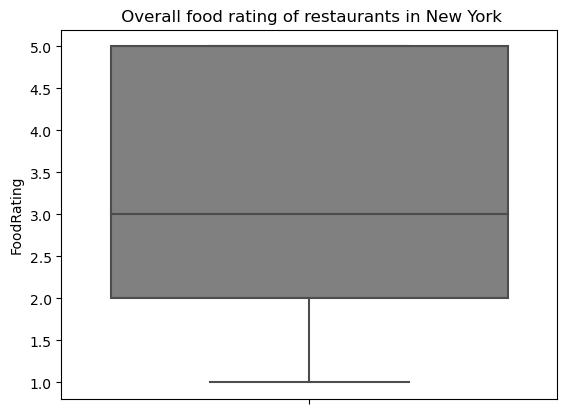

In [17]:
plt.title( ' Overall food rating of restaurants in New York')
sns.boxplot( data= data , y= 'FoodRating'  , color = 'grey'   )
plt.show()

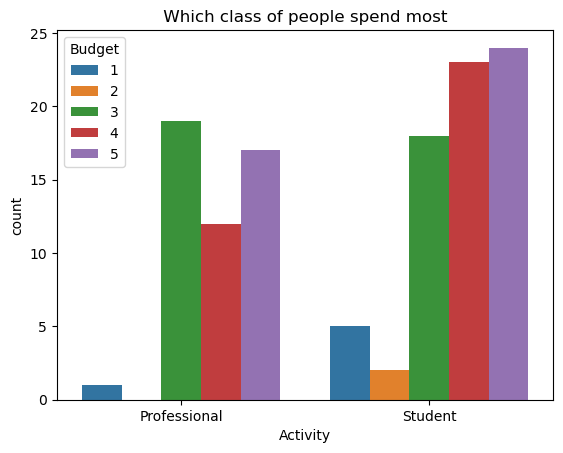

In [58]:
plt.title(' Which class of people spend most ')
sns.countplot ( data= data , x = 'Activity' , hue = 'Budget')
plt.show()

<b><center> Students spend more than professionals in New York

### <center> MULTIVARIATE ANALYSIS

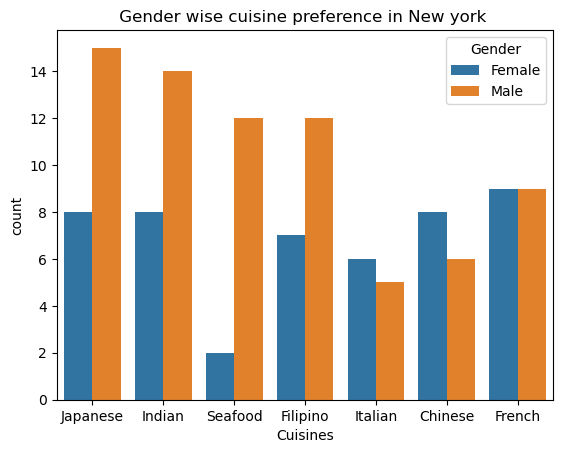

In [18]:
plt.title(' Gender wise cuisine preference in New york  ')
sns.countplot ( data = data , x = 'Cuisines', hue = 'Gender'  )
plt.show()

#### Most number of males  in New York prefer Japanese, Indian and Filipino Cuisines and most number of females prefer French Cuisines

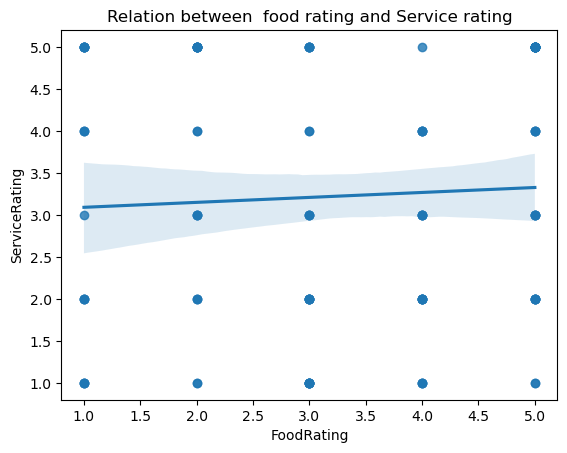

In [20]:
plt.title( 'Relation between  food rating and Service rating')
sns.regplot ( data= data , x = 'FoodRating' , y = 'ServiceRating')
plt.show()

#### Food rating and Overall rating shows no Correlation

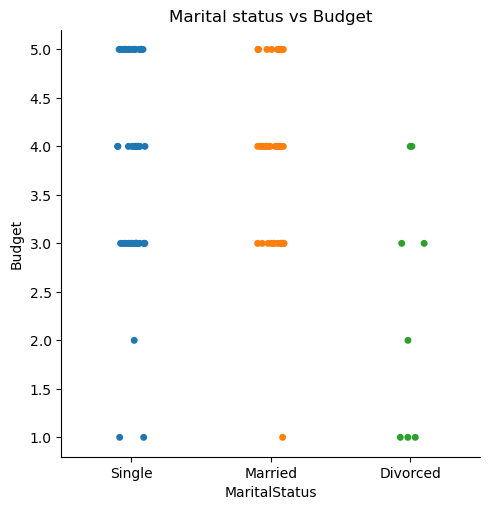

In [21]:
sns.catplot ( data= data , x = 'MaritalStatus' , y ='Budget' )
plt.title ('Marital status vs Budget')
plt.show()

######       Divorced people spend least on food

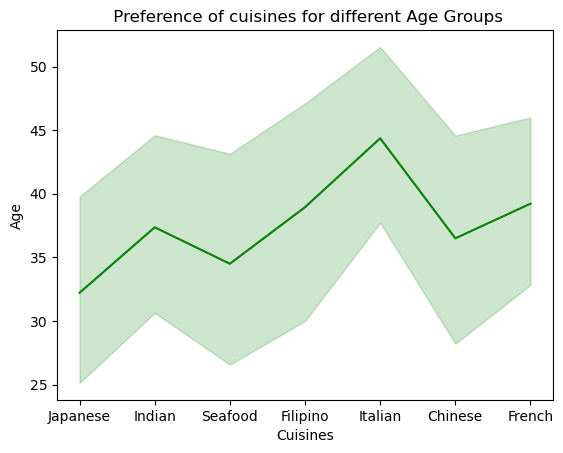

In [22]:
plt.title( ' Preference of cuisines for different Age Groups')
sns.lineplot ( data= data , x = 'Cuisines' , y = 'Age' ,color = 'green')
plt.show()



In [23]:
data.Cuisines.value_counts()

Japanese    23
Indian      22
Filipino    19
French      18
Seafood     14
Chinese     14
Italian     11
Name: Cuisines, dtype: int64

In [24]:
palette_color = sns.color_palette ('dark')

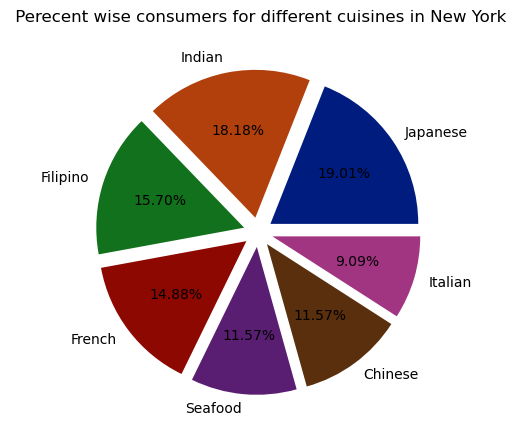

In [25]:
plt.title( ' Perecent wise consumers for different cuisines in New York' "\n", )
plt.pie(data=data,x=data.Cuisines.value_counts(),\
explode = [0.1, 0.10, 0.1,0.10,0.1,0.1,0.1], \
colors=palette_color,\
labels=['Japanese   ','Indian' ,'Filipino','French' ,'Seafood' ,'Chinese'  ,  'Italian' ],\
autopct='%0.2f%%');

In [26]:
data.Location.value_counts()

St. George,NY         26
Riverdale,NY          19
Upper East Side,NY    18
Central Park,NY       14
China Town, NY        14
Upper West Side,NY    11
Market City, NY       11
Central Park,ny        6
Market City, MY        1
Cedar Hill, NY         1
Name: Location, dtype: int64

In [27]:
cuisine_vsgender = pd.crosstab( data.Gender ,data.Cuisines, margins = False )
cuisine_vsgender

Cuisines,Chinese,Filipino,French,Indian,Italian,Japanese,Seafood
Gender,,,,,,,
Female,8,7,9,8,6,8,2
Male,6,12,9,14,5,15,12


In [28]:
cuisines=data.groupby ( ['Cuisines']) ['Age'].value_counts()
cuisines

Cuisines  Age
Chinese   17     2
          28     2
          18     1
          23     1
          24     1
                ..
Seafood   35     1
          36     1
          49     1
          58     1
          64     1
Name: Age, Length: 93, dtype: int64

In [29]:
genderwise_budget = data.groupby(['Gender']) ['Budget'].value_counts()
genderwise_budget

Gender  Budget
Female  5         18
        4         16
        3         11
        1          2
        2          1
Male    3         26
        5         23
        4         19
        1          4
        2          1
Name: Budget, dtype: int64

#### Data of Females above age 40

In [30]:
female_Above40 = data.query("Age>40 & Gender == 'Female'") 
female_Above40.drop (columns = ['ServiceRating','OverallRating','Often_A_S', 'Gender','FoodRating','Location'] , inplace =True)
female_Above40.sort_values( by ='Age')

,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,Age
95,Single,Professional,4,French,Never,Socially,41
56,Divorced,Student,2,Italian,Socially,Often,42
84,Divorced,Student,4,Chinese,Often,Often,45
6,Married,Professional,5,Indian,Often,Socially,46
28,Married,Student,4,French,Socially,Never,46
106,Married,Professional,5,Indian,Never,Socially,46
110,Married,Professional,4,French,Socially,Often,48
10,Married,Professional,4,French,Never,Often,48
80,Married,Professional,4,French,Never,Socially,49
49,Married,Student,5,Japanese,Socially,Socially,49


<b>UNIVARIATE ANALYSIS

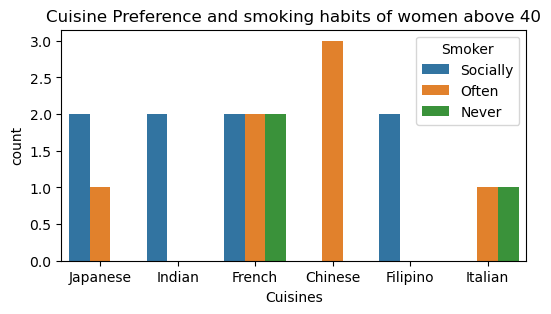

In [31]:
plt.figure(figsize=(6,3))
plt.title( 'Cuisine Preference and smoking habits of women above 40')
sns.countplot(data= female_Above40 , x ='Cuisines', hue = 'Smoker')
plt.show()

##### <center> Females above age 40 prefer chinese food least prefered is Japanese food and they smoke often , 

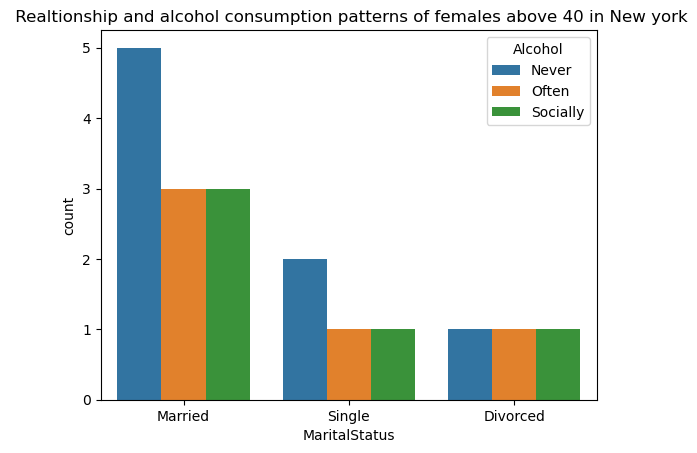

In [32]:
plt.title ( ' Realtionship and alcohol consumption patterns of females above 40 in New york')
sns.countplot( data= female_Above40 , x = 'MaritalStatus',  hue = 'Alcohol')
plt.show()

###### <center> Females above 40 are mostly married and  most of them  never consume alcohol

<b>Custom function to create location wise dataframe

In [33]:
def sort_location(Location):
    data_location = data[data.Location == Location]
    data_location.drop( columns = 'Location', inplace =True)
    return data_location

In [34]:
Central_Park_NY = sort_location('Central Park,NY')

Central_Park_NY

,Gender,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often_A_S,Age
4,Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,26
9,Male,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,28
18,Male,Single,Student,3,Filipino,Socially,Socially,3,5,4.0,No,22
19,Male,Married,Student,4,Seafood,Often,Never,3,1,2.0,No,64
26,Female,Single,Student,3,Indian,Never,Socially,2,3,2.5,No,22
34,Male,Divorced,Student,1,Japanese,Socially,Often,5,5,5.0,No,22
40,Male,Single,Student,2,Seafood,Often,Never,2,2,2.0,No,22
43,Male,Single,Student,3,French,Never,Often,4,1,2.5,No,23
60,Female,Single,Student,4,Japanese,Never,Never,4,3,3.5,No,20
64,Female,Single,Student,4,Italian,Never,Never,5,5,5.0,No,27


In [35]:
China_Town_NY =sort_location('China Town, NY')
China_Town_NY

,Gender,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often_A_S,Age
5,Male,Single,Student,5,Seafood,Never,Never,5,1,3.0,No,28
6,Female,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,46
27,Male,Single,Student,5,Indian,Never,Never,1,5,3.0,No,23
45,Male,Married,Student,3,Chinese,Never,Never,2,5,3.5,No,47
48,Male,Single,Student,3,Seafood,Never,Socially,1,2,1.5,No,25
66,Male,Single,Student,3,Seafood,Socially,Never,3,3,3.0,No,14
68,Male,Married,Student,4,French,Never,Socially,3,3,3.0,No,62
78,Male,Married,Professional,3,Seafood,Often,Often,5,5,5.0,Yes,58
79,Female,Single,Student,1,Filipino,Often,Socially,1,5,3.0,No,25
91,Male,Divorced,Professional,3,French,Never,Often,3,1,2.0,No,54


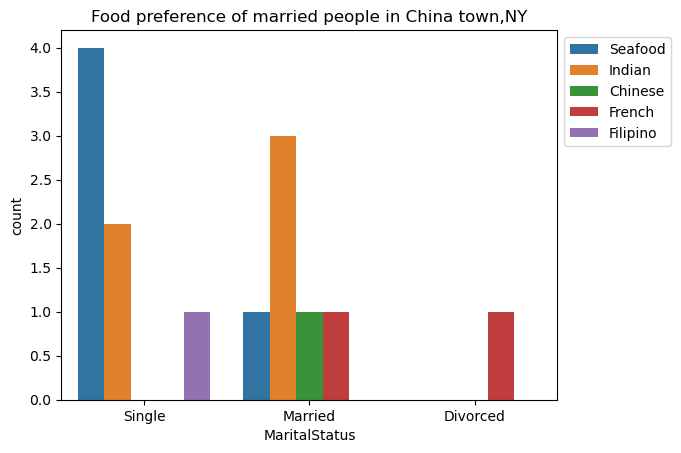

In [36]:
plt.title('Food preference of married people in China town,NY')
sns.countplot(data = China_Town_NY , x = 'MaritalStatus' , hue ='Cuisines')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

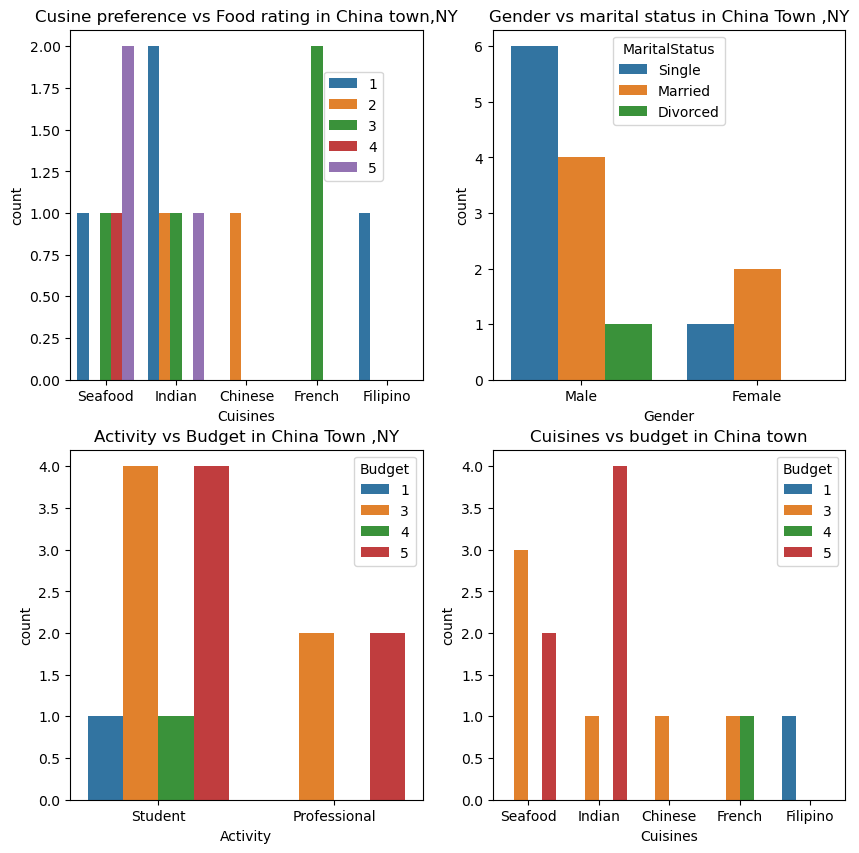

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Cusine preference vs Food rating in China town,NY')
sns.countplot(data = China_Town_NY , x = 'Cuisines' , hue ='FoodRating')
plt.legend(bbox_to_anchor = (0.7,0.9))

plt.subplot(2,2,2)
plt.title('Gender vs marital status in China Town ,NY')
sns.countplot(data =China_Town_NY , x = 'Gender', hue = 'MaritalStatus')

plt.subplot(2,2,3)
plt.title('Activity vs Budget in China Town ,NY')
sns.countplot(data =China_Town_NY , x = 'Activity', hue = 'Budget' )

plt.subplot(2,2,4)
plt.title('Cuisines vs budget in China town')
sns.countplot(data = China_Town_NY , x = 'Cuisines' , hue ='Budget')
plt.show()

<b> *China town's top  rated cuisine is seafood  and least rated is Indian foods
<b> *Most number of men in China town are Single
<b> *Students spend most on cuisines in china town
<b> *People in China twon spend more in Indian cuisines

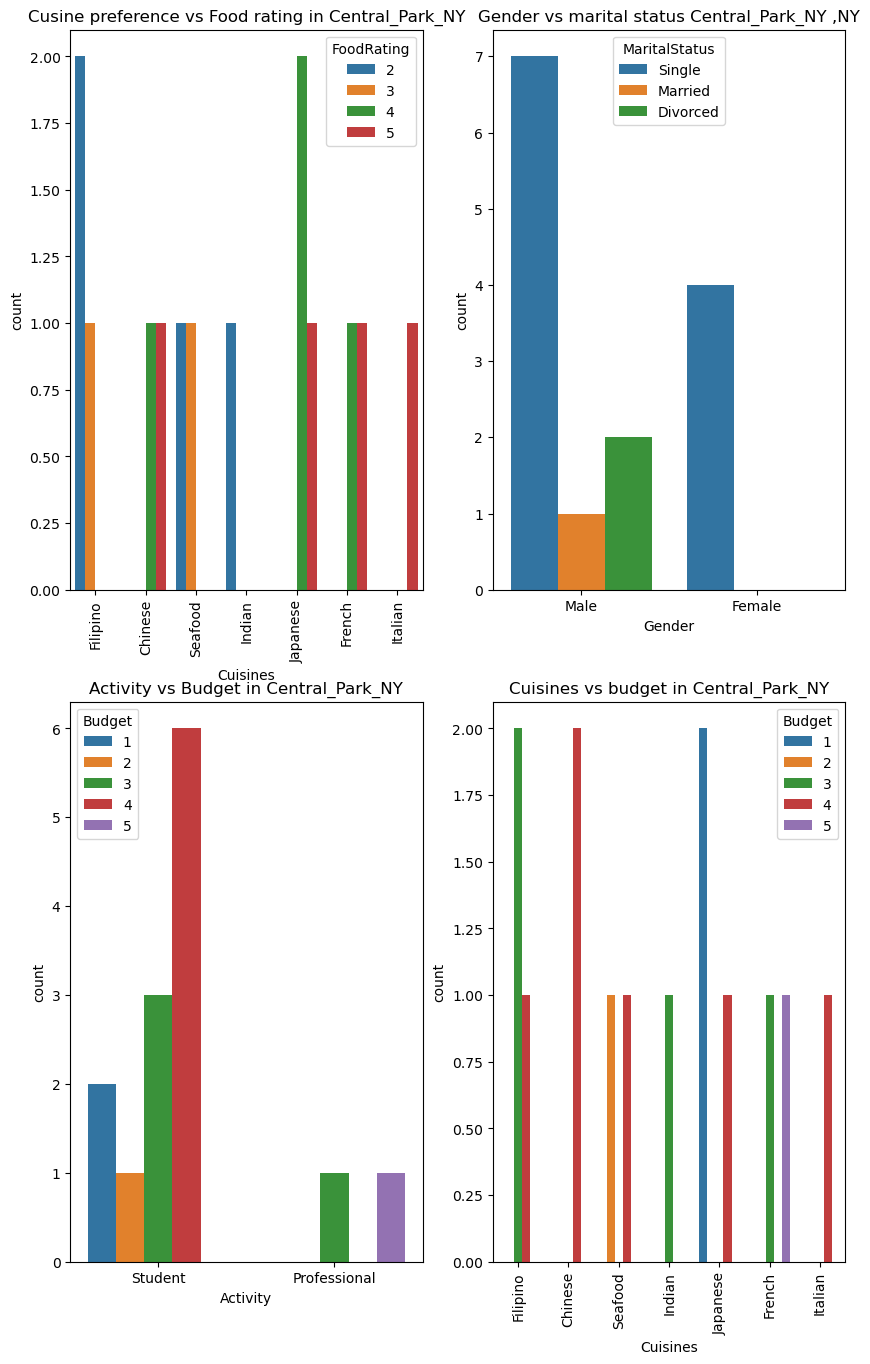

In [63]:
plt.figure(figsize=(10,16))
plt.subplot(2,2,1)
plt.title('Cusine preference vs Food rating in Central_Park_NY')
plt.xticks(rotation  = 90)
sns.countplot(data = Central_Park_NY , x = 'Cuisines' , hue ='FoodRating')

plt.subplot(2,2,2)
plt.title('Gender vs marital status Central_Park_NY ,NY')
sns.countplot(data =Central_Park_NY , x = 'Gender', hue = 'MaritalStatus')

plt.subplot(2,2,3)
plt.title('Activity vs Budget in Central_Park_NY')
sns.countplot(data =Central_Park_NY , x = 'Activity', hue = 'Budget' )

plt.subplot(2,2,4)
plt.title('Cuisines vs budget in Central_Park_NY')
sns.countplot(data = Central_Park_NY , x = 'Cuisines' , hue ='Budget')
plt.xticks(rotation =90)
plt.show()

<b> * Least rated Cuisine in Central park is Japanese 
<b> * Most males are single
<b> * Students spend most on cuisines
<b> * People spend more in Chinese Cuisines

In [39]:
UpperEastSide_NY = sort_location( 'Upper East Side,NY')
UpperEastSide_NY

,Gender,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often_A_S,Age
0,Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,17
3,Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,67
7,Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,20
15,Female,Married,Student,3,French,Often,Never,4,1,2.5,No,67
17,Male,Single,Student,3,Japanese,Often,Often,1,5,3.0,Yes,19
21,Female,Married,Professional,5,Italian,Socially,Never,1,4,2.5,No,40
38,Male,Married,Student,4,French,Never,Never,2,3,2.5,No,36
51,Female,Single,Student,3,Chinese,Often,Socially,3,2,2.5,No,18
52,Female,Single,Professional,4,Chinese,Never,Often,3,5,4.0,No,49
63,Female,Married,Student,5,Italian,Never,Socially,1,1,1.0,No,34


<b>Custom function to create Cuisine wise dataframe

In [40]:
def cuisine_wise(cuisines):
    data_cuisines = data [data.Cuisines == cuisines]
    data_cuisines.drop(columns = 'Cuisines', inplace =True)
    return data_cuisines

<b>Japanese cuisine dataset sorted

In [41]:
Japanese_cuisines = cuisine_wise('Japanese')
Japanese_cuisines

,Location,Gender,MaritalStatus,Activity,Budget,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often_A_S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Never,Never,5,4,4.5,No,17
3,"Upper East Side,NY",Female,Married,Professional,5,Never,Socially,3,1,2.0,No,67
17,"Upper East Side,NY",Male,Single,Student,3,Often,Often,1,5,3.0,Yes,19
25,"St. George,NY",Male,Single,Professional,3,Never,Socially,4,3,3.5,No,54
34,"Central Park,NY",Male,Divorced,Student,1,Socially,Often,5,5,5.0,No,22
35,"Riverdale,NY",Male,Single,Professional,5,Never,Socially,1,3,2.0,No,25
36,"Market City, NY",Male,Single,Student,4,Often,Often,5,2,3.5,Yes,17
42,"St. George,NY",Male,Married,Student,5,Never,Never,3,1,2.0,No,38
49,"Riverdale,NY",Female,Married,Student,5,Socially,Socially,2,5,3.5,No,49
50,"Riverdale,NY",Female,Single,Student,4,Often,Often,5,5,5.0,Yes,16


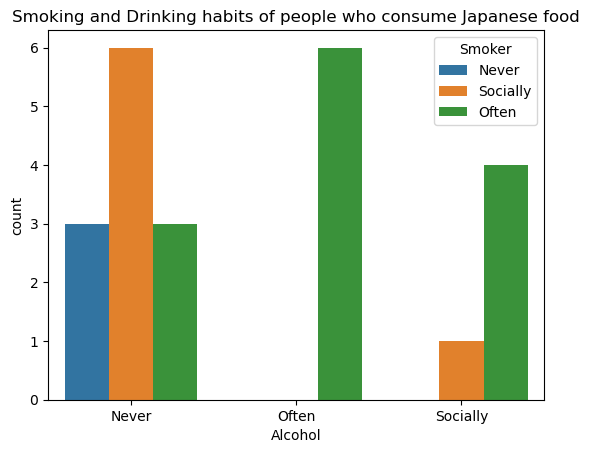

In [42]:
plt.title('Smoking and Drinking habits of people who consume Japanese food')

sns.countplot( data = Japanese_cuisines , x = 'Alcohol' , hue = 'Smoker')
plt.show()

###### People who consume japanese food never consume alcohol but smoke socially

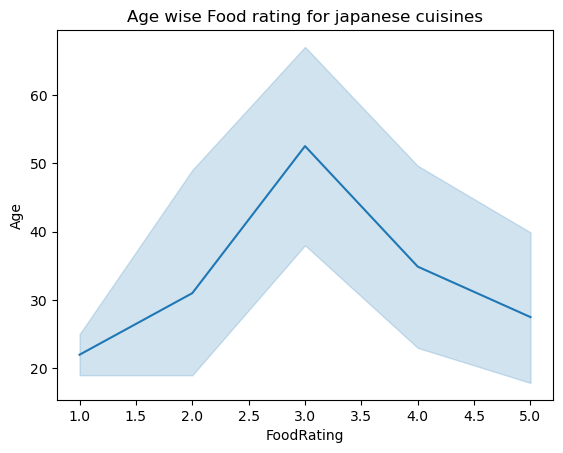

In [43]:
plt.title('Age wise Food rating for japanese cuisines')
sns.lineplot( data= Japanese_cuisines , x ='FoodRating', y ='Age' )
plt.show()

###### People in age range 20-22 gave least ratings and people in age range 25-30 gave highest food ratings for japanese cuisines

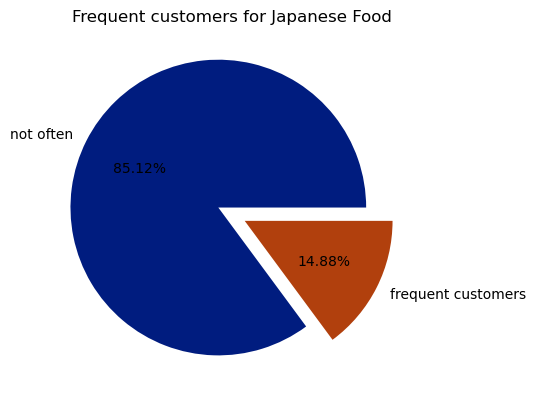

In [44]:
plt.pie( data = Japanese_cuisines , x = data.Often_A_S.value_counts(),\
           explode = [0.1,0.1] , colors =palette_color, labels = ["not often", 'frequent customers'],\
           autopct ='%0.2f%%');
plt.title('Frequent customers for Japanese Food')
plt.show()

##### 14.88% are frequent customers for japanese food in New York

In [45]:
Italian_cuisines = cuisine_wise('Italian')
Italian_cuisines

,Location,Gender,MaritalStatus,Activity,Budget,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often_A_S,Age
8,"Riverdale,NY",Male,Single,Student,5,Socially,Socially,3,3,3.0,No,58
13,"Riverdale,NY",Male,Single,Student,5,Often,Socially,5,2,3.5,No,43
21,"Upper East Side,NY",Female,Married,Professional,5,Socially,Never,1,4,2.5,No,40
44,"St. George,NY",Female,Married,Professional,3,Often,Never,4,1,2.5,No,54
56,"St. George,NY",Female,Divorced,Student,2,Socially,Often,5,5,5.0,No,42
59,"Upper West Side,NY",Male,Married,Professional,5,Socially,Socially,2,2,2.0,No,64
63,"Upper East Side,NY",Female,Married,Student,5,Never,Socially,1,1,1.0,No,34
64,"Central Park,NY",Female,Single,Student,4,Never,Never,5,5,5.0,No,27
69,"Riverdale,NY",Female,Single,Student,1,Never,Often,2,5,3.5,No,25
108,"Riverdale,NY",Male,Single,Student,5,Socially,Often,5,3,4.0,No,58


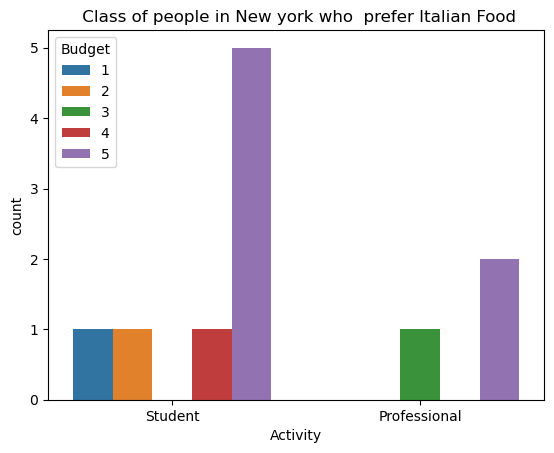

In [65]:
plt.title(' Class of people in New york who  prefer Italian Food') 
sns.countplot( data =Italian_cuisines , x = 'Activity' , hue = 'Budget' )
plt.show()

###### Italian Food is preferred mostly by Students in New york

In [47]:
student_italian_20 =data.query(" Activity == 'Student' & Age >20 & Cuisines == 'Italian'")
student_italian_20.drop( columns = ['Activity', 'Cuisines' ] , inplace = True)

In [48]:
student_italian_20

,Location,Gender,MaritalStatus,Budget,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often_A_S,Age
8,"Riverdale,NY",Male,Single,5,Socially,Socially,3,3,3.0,No,58
13,"Riverdale,NY",Male,Single,5,Often,Socially,5,2,3.5,No,43
56,"St. George,NY",Female,Divorced,2,Socially,Often,5,5,5.0,No,42
63,"Upper East Side,NY",Female,Married,5,Never,Socially,1,1,1.0,No,34
64,"Central Park,NY",Female,Single,4,Never,Never,5,5,5.0,No,27
69,"Riverdale,NY",Female,Single,1,Never,Often,2,5,3.5,No,25
108,"Riverdale,NY",Male,Single,5,Socially,Often,5,3,4.0,No,58
113,"Riverdale,NY",Male,Single,5,Often,Socially,5,3,4.0,No,43


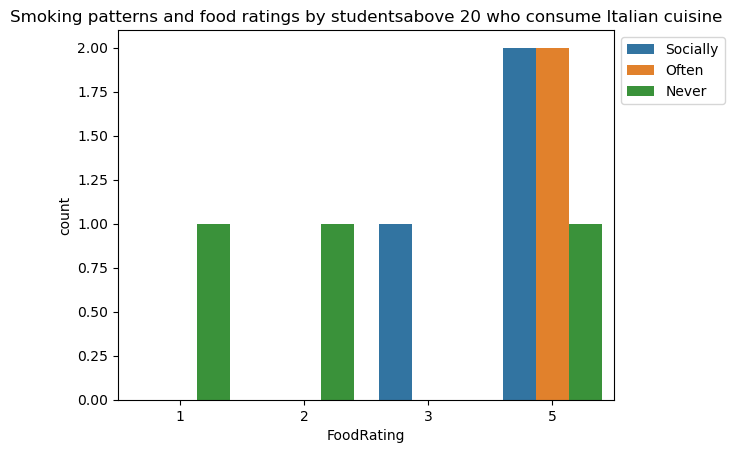

In [49]:
plt.title('Smoking patterns and food ratings by studentsabove 20 who consume Italian cuisine')
sns.countplot( data = student_italian_20 , x = 'FoodRating', hue = 'Alcohol')
plt.legend(bbox_to_anchor = [1,1])
plt.show()

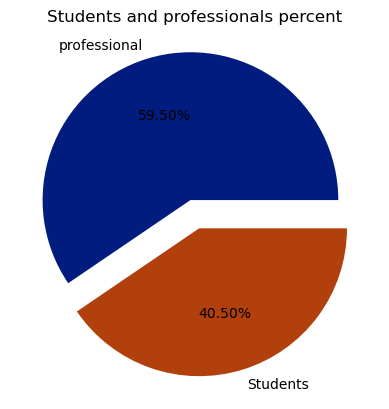

In [53]:
plt.pie( data = data , x = data.Activity.value_counts(),\
           explode = [0.1,0.1] , colors =palette_color, labels = ['professional', 'Students'],\
           autopct ='%0.2f%%');
plt.title('Students and professionals percent')
plt.show()

<b><center> 59.5% of people are professionals ans rest are students